<a href="https://colab.research.google.com/github/llayer/inferno/blob/master/inferno_TF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INFERNO with TF 1.x

## Install the old tensorflow versions and the required packages

In [1]:
!pip install tensorflow==1.10.1

     |████████████████████████████████| 58.4MB 73kB/s 
     |████████████████████████████████| 573kB 46.8MB/s 
     |████████████████████████████████| 12.2MB 45.9MB/s 
     |████████████████████████████████| 3.3MB 44.0MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: umap-learn 0.4.0 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: numba 0.48.0 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: google-auth 1.7.2 has requirement setup

In [2]:
!pip install tensorflow-probability==0.3.0

     |████████████████████████████████| 512kB 2.7MB/s 
  Found existing installation: tensorflow-probability 0.9.0
    Uninstalling tensorflow-probability-0.9.0:
      Successfully uninstalled tensorflow-probability-0.9.0


In [0]:
from tqdm import trange

In [4]:
import tensorflow as tf
import tensorflow_probability as tfp

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [0]:
ge = tf.contrib.graph_editor
ds = tfp.distributions

In [6]:
!pip install git+https://github.com/pablodecm/neyman.git

  Cloning https://github.com/pablodecm/neyman.git to /tmp/pip-req-build-xrnsxoyw
  Running command git clone -q https://github.com/pablodecm/neyman.git /tmp/pip-req-build-xrnsxoyw
     |████████████████████████████████| 71kB 2.3MB/s 
  Created wheel for neyman: filename=neyman-0.0.1-cp36-none-any.whl size=5293 sha256=47dfc6da08061c57057d150c0f8d4fb9ab3532f355a1e5f2d557ada40d53277c
  Stored in directory: /tmp/pip-ephem-wheel-cache-nxxrxo2h/wheels/c5/02/c3/daef8b8e644e4dbee14ad489db8f51c08838dfcc1a621ed3ea
  Created wheel for edward: filename=edward-1.3.5-cp36-none-any.whl size=90388 sha256=6f3f0db6c4fcf598c9392411494e1493dbc0f2de6e465e4361ca4ef815c37f8d
  Stored in directory: /root/.cache/pip/wheels/ae/61/0c/1f36f3f0c629d1b7a24d042d2c37015a66c091729c95dd8425
Successfully built neyman edward


/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/edward-1.3.5.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/neyman-0.0.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [7]:
!ls

sample_data


In [0]:
from neyman.inferences import batch_hessian

In [9]:
! git clone https://github.com/llayer/paper-inferno

Cloning into 'paper-inferno'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1063 (delta 8), reused 7 (delta 0), pack-reused 1048
Receiving objects: 100% (1063/1063), 1.56 MiB | 1.67 MiB/s, done.
Resolving deltas: 100% (687/687), done.


In [10]:
%cd paper-inferno/

/content/paper-inferno


In [11]:
!ls

code  environment.yml  LICENSE	notebooks  paper  README.md  setup.cfg


In [12]:
%cd code

/content/paper-inferno/code


In [13]:
!ls

benchmarking.py		       synthetic_3D_inferno.py
extended_model.py	       synthetic_3D_train_cross_entropy.py
fisher_matrix.py	       synthetic_3D_train_inferno.py
summary_statistic_computer.py  template_likelihood.py
synthetic_3D_cross_entropy.py  template_model.py
synthetic_3D_example.py        train_helpers.py


## Train the model

In [0]:
from neyman.inferences import batch_hessian

from synthetic_3D_example import SyntheticThreeDimExample
from train_helpers import MixtureBatcher
import os
import json
import itertools as it
from fisher_matrix import FisherMatrix
import numpy as np

In [0]:
k = tf.keras
ds = tfp.distributions
ge = tf.contrib.graph_editor

In [0]:
class SyntheticThreeDimInferno(object):

  def __init__(self, model_path, poi, pars, seed, aux={}):

    tf.set_random_seed(seed)

    self.problem = SyntheticThreeDimExample()

    self.batcher = MixtureBatcher(["sig", "bkg"])

    s_batch = self.batcher.batch["sig"]
    b_batch = self.problem.transform_bkg(self.batcher.batch["bkg"])
    b_sizes = [tf.shape(s_batch)[0], tf.shape(b_batch)[0]]
    train_batch = tf.concat([s_batch, b_batch], axis=0,
                            name="input_batch")

    k_init = "he_normal"
    Dense = k.layers.Dense
    self.nn_model = k.Sequential([Dense(units=100, activation="relu",
                                        kernel_initializer=k_init,
                                        input_shape=(3,)),
                                  Dense(units=100, activation="relu",
                                        kernel_initializer=k_init),
                                  Dense(units=10, activation="linear")])

    self.logits = self.nn_model(train_batch)
    self.temperature = tf.placeholder_with_default(1., shape=())
    self.probs = tf.nn.softmax(self.logits / self.temperature)

    s_probs, b_probs = tf.split(self.probs, b_sizes, axis=0)

    s_counts = tf.reduce_mean(s_probs, axis=0)
    b_counts = tf.reduce_mean(b_probs, axis=0),

    self.exp_counts = tf.cast(self.problem.s_exp * s_counts +
                              self.problem.b_exp * b_counts,
                              dtype=tf.float64)

    self.pois = ds.Poisson(self.exp_counts, name="poisson")
    self.asimov = tf.stop_gradient(self.exp_counts, name="asimov")

    self.nll = - tf.cast(tf.reduce_sum(self.pois.log_prob(self.asimov)),
                         name="nll", dtype=tf.float32)

    all_pars = list(self.problem.all_pars.values())
    self.hess_nll, self.grad_nll = batch_hessian(self.nll,
                                                 all_pars)

    self.aux = aux

    self.nll_aux = {}
    self.hess_nll_aux = {}
    for par, dist in self.aux.items():
        self.nll_aux[par] = -dist.log_prob(self.problem.all_pars[par])
        self.hess_nll_aux[par], _ = batch_hessian(self.nll_aux[par],
                                                  all_pars)

    self.ext_nll = sum([self.hess_nll] + list(self.hess_nll_aux.values()))

    self.cov_nll = self.cov_matrix(pars)
    idx_poi = pars.index(poi)
    self.loss = self.cov_nll[idx_poi, idx_poi]

    # remove stop gradient after loss is computed
    ge.edit.bypass(self.asimov.op)

    self.lr = tf.placeholder(shape=(), dtype=tf.float32)
    self.optimizer = tf.train.GradientDescentOptimizer(self.lr)
    self.global_step = tf.Variable(0, name='global_step', trainable=False)
    self.train_op = self.optimizer.minimize(
        self.loss, global_step=self.global_step)

    self.init_op = tf.global_variables_initializer()

    self.model_path = model_path

    if not os.path.exists(self.model_path):
      os.makedirs(self.model_path)

    json_str = self.nn_model.to_json()
    with open(f'{self.model_path}/model.json', 'w') as f:
      json.dump(json_str, f)

    self.saver = tf.train.Saver()
    self.history = {}

  def cov_matrix(self, pars):

    pars = tuple(pars)

    indices = [list(self.problem.all_pars.keys()).index(par) for par in pars]
    idx_subset = np.reshape(list(it.product(indices, indices)),
                            (len(pars), len(pars), -1))
    hess_subset = tf.gather_nd(self.ext_nll, idx_subset)
    cov_nll = tf.matrix_inverse(hess_subset)

    return cov_nll

  def fit(self, n_epochs, lr, temperature, batch_size, seed, par_phs={}):

    with tf.Session() as sess:
      train_arrays = sess.run(self.problem.train_data())
      valid_arrays = sess.run(self.problem.valid_data())

    phs_train = {self.lr: lr,
                 self.temperature: temperature}

    phs_val = {self.temperature: temperature}

    rs = np.random.RandomState(seed=seed)

    with tf.Session() as sess:

      #writer = tf.summary.FileWriter('logs', sess.graph)

      k.backend.set_session(sess)
      sess.run(self.init_op)
      batch_n = 0
      with trange(n_epochs) as t:
        for i in t:
          shuffle_seed = rs.randint(np.iinfo(np.int32).max)
          self.batcher.init_iterator(train_arrays,
                                     batch_size=batch_size, seed=shuffle_seed)
          while True:
            try:
              batch_n += 1

              
              loss_t, _ = sess.run([self.loss, self.train_op], phs_train)
              #print( loss_t )
              #print( self.loss.eval() )

              """
              loss_t = sess.run(self.loss, phs_train)
              print( "Loss in first session run" )
              print(self.loss.eval())
              print( "Cov first session run" )
              print(self.cov_nll.eval())
              sess.run(self.train_op, phs_train)
              print( "Loss in second session run" )
              print(self.loss.eval())
              print( "Cov second session run" )
              print(self.cov_nll.eval())
              """
              self.history.setdefault("loss_train", []).append(
                  [batch_n, float(np.sqrt(loss_t))])
            except tf.errors.OutOfRangeError:
              break
          # fix seed for validation set (no need to shuffle)
          self.batcher.init_iterator(valid_arrays,
                                     batch_size=batch_size, seed=20)
          val_losses = []
          while True:
            try:
              loss_t = sess.run([self.loss], phs_val)
              val_losses.append(np.sqrt(loss_t))
            except tf.errors.OutOfRangeError:
              break
          val_loss = np.mean(val_losses)
          val_loss_std = np.std(val_losses, ddof=1)
          t.set_postfix({"mean_val_loss": val_loss})
          self.history.setdefault("loss_valid", []).append(
              [batch_n, float(val_loss)])
          self.history.setdefault("loss_std_valid", []).append(
              [batch_n, float(val_loss_std)])

      self.nn_model.save_weights(f'{self.model_path}/model.h5')
      self.saver.save(sess, f'{self.model_path}/model.ckpt',
                      global_step=self.global_step)
      with open(f'{self.model_path}/history.json', 'w') as fp:
        json.dump(self.history, fp)

  def load_weights(self):
    sess = tf.get_default_session()
    last_ckpt = tf.train.latest_checkpoint(f'{self.model_path}')
    print("loading_vars_from", last_ckpt)
    self.saver.restore(sess, last_ckpt)

  def eval_hessian(self, temperature):

    phs_val = {self.temperature: temperature}

    with tf.Session() as sess:
      valid_arrays = sess.run(self.problem.valid_data())
      self.load_weights()
      self.batcher.init_iterator(valid_arrays,
                                 batch_size=-1, seed=20)
      hess, hess_aux = sess.run([self.hess_nll, self.hess_nll_aux], phs_val)
      print(hess)


    pars = list(self.problem.all_pars.keys())
    fisher = FisherMatrix(hess, pars)
    aux_fisher = FisherMatrix(sum(hess_aux.values()), pars)

    return fisher, aux_fisher

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive/model_tf1.h5"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [32]:
n_epochs = 100
lr = 1e-6
batch_size = 1000
t_train = 0.1
t_eval = 0.05

n_inits = 100
seed = 7

pars = ["s_exp", "r_dist", "b_rate"]

aux = {"r_dist": ds.Normal(loc=2.0, scale=0.4),
       "b_rate": ds.Normal(loc=3.0, scale=1.)}


inf_path = path

inferno = SyntheticThreeDimInferno(model_path=inf_path, poi="s_exp",
                                    pars=pars, seed=seed, aux=aux)

inferno.fit(n_epochs=n_epochs, lr=lr, batch_size=batch_size,
            temperature=t_train, seed=seed)

inf_fisher, inf_aux_fisher = inferno.eval_hessian(temperature=t_eval)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  append_fn(tensor_proto, proto_values)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  append_fn(tensor_proto, proto_values)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  append_fn(tensor_proto, proto_values)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  append_fn(tensor_proto, proto_values)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated 

loading_vars_from /content/gdrive/My Drive/model_tf1.h5/model.ckpt-10000
INFO:tensorflow:Restoring parameters from /content/gdrive/My Drive/model_tf1.h5/model.ckpt-10000
[[ 3.9608134e-03 -2.1585055e-01 -7.0352688e-02  8.0193585e-04]
 [-2.1585131e-01  8.7026276e+01  2.3724300e+01  1.0792568e-02]
 [-7.0353150e-02  2.3724384e+01  1.4914366e+01  3.5176619e-03]
 [ 8.0193579e-04  1.0792408e-02  3.5180778e-03  9.5989980e-04]]


## Templates

In [0]:
from template_model import TemplateModel
from summary_statistic_computer import SummaryStatisticComputer
from train_helpers import NumpyEncoder

In [69]:
aux_std = [None, 0.4, 1.0, 100.]
(["s_exp", "r_dist", "b_rate"], aux_std)

(['s_exp', 'r_dist', 'b_rate'], [None, 0.4, 1.0, 100.0])

In [35]:
tm = TemplateModel()
ssc = SummaryStatisticComputer()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  append_fn(tensor_proto, proto_values)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  append_fn(tensor_proto, proto_values)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  append_fn(tensor_proto, proto_values)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  append_fn(tensor_proto, proto_values)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:536: DeprecationWarning: np.asscalar(a) is deprecated 

In [0]:
sess = tf.Session()

In [37]:
with sess.as_default():
    shapes = ssc.classifier_shapes(path, sess=sess)
    with open(path + "/templates.json", 'w') as t_file:
        json.dump({str(k): v for k, v in shapes.items()}, t_file, cls=NumpyEncoder)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/usr/local/lib/python3.6/dist-pa

In [38]:
shapes

{('bkg',
  1.8,
  2.5): array([93889,  4511,   888,   347,   167,   102,    48,    33,    12,
            3]),
 ('bkg',
  1.8,
  3.0): array([94798,  4154,   634,   228,   105,    37,    32,     8,     3,
            1]),
 ('bkg',
  1.8,
  3.5): array([95508,  3767,   472,   159,    49,    29,    12,     3,     1,
            0]),
 ('bkg',
  2.0,
  2.5): array([94422,  4119,   786,   324,   178,    83,    48,    26,    11,
            3]),
 ('bkg',
  2.0,
  3.0): array([95260,  3754,   597,   221,    98,    35,    21,    10,     3,
            1]),
 ('bkg',
  2.0,
  3.5): array([95827,  3504,   448,   137,    44,    28,     7,     4,     1,
            0]),
 ('bkg',
  2.2,
  2.5): array([94846,  3792,   737,   314,   158,    67,    52,    20,    12,
            2]),
 ('bkg',
  2.2,
  3.0): array([95655,  3458,   533,   210,    73,    38,    21,     9,     2,
            1]),
 ('bkg',
  2.2,
  3.5): array([96203,  3172,   432,   116,    40,    25,     9,     2,     1,
            0]),
 

## Profile likelihood

In [65]:
tm = TemplateModel(multiple_pars=True)

step_size = 0.1
n_steps = 100
d = 0.0
pars = ["r_dist","b_rate"]

s_exp_scan = np.linspace(20.,80.,61, endpoint=True)
par_phs = {tm.r_dist : 2.0*np.ones_like(s_exp_scan),
           tm.b_rate : 3.0*np.ones_like(s_exp_scan),
           tm.s_exp :  s_exp_scan,
           tm.b_exp : 1000.0*np.ones_like(s_exp_scan)} 


#inf_pls = {}
#inf_nlls = {}
#for inf_path in glob(inf_template_path):
with tf.Session() as sess:
    
    tm.templates_from_json(path + "/templates.json")

    #print(tm.shape_phs)

    #asimov_data = sess.run(tm.bkg_shape, {**tm.shape_phs})
    asimov_data = tm.asimov_data(sess=sess)

    #print(sess.run(tm.t_exp))

    print(asimov_data)


    obs_phs = {tm.obs : asimov_data}
    mod_phs = par_phs.copy()
    # get likelihood before changing pars
    nll, sub_hess, sub_grad = tm.hessian_and_gradient(pars=pars,
                                                      par_phs=mod_phs, obs_phs=obs_phs)
    
    print(nll)

    
    
    # profile likelihood with Newton method
    for i in range(n_steps):
      newton_step =  np.matmul(np.linalg.inv(sub_hess+d*np.ones([len(pars)])),sub_grad[:,:,np.newaxis])

      mod_phs[tm.r_dist] = mod_phs[tm.r_dist] - step_size*newton_step[:,0,0]
      mod_phs[tm.b_rate] = mod_phs[tm.b_rate] - step_size*newton_step[:,1,0]

      print("step", i)
      #print(mod_phs)

      p_nll, sub_hess, sub_grad = tm.hessian_and_gradient(pars=["r_dist","b_rate"],
                                                        par_phs=mod_phs, obs_phs=obs_phs)
      
      print(p_nll)
    
    print("nll - p_nll",(p_nll-nll).sum())
    

[9.80424500e+02 5.20149994e+01 9.66749954e+00 3.96899986e+00
 1.89800000e+00 9.07500029e-01 5.63499987e-01 3.33999991e-01
 1.64499998e-01 5.64999953e-02]
[16.879148  16.754284  16.63483   16.520676  16.411713  16.307835
 16.208944  16.114946  16.025745  15.9412565 15.861392  15.78607
 15.71521   15.648736  15.586574  15.52865   15.4748955 15.425242
 15.379625  15.337979  15.300245  15.26636   15.236268  15.20991
 15.187234  15.168183  15.152707  15.140755  15.132276  15.127223
 15.125549  15.127208  15.132155  15.140347  15.15174   15.166294
 15.183968  15.2047205 15.228516  15.255314  15.285078  15.317772
 15.353361  15.39181   15.433085  15.477153  15.523981  15.573537
 15.625791  15.680711  15.738267  15.798431  15.861174  15.926467
 15.994282  16.064594  16.137373  16.212597  16.290237  16.370268
 16.45267  ]
step 0
[16.888147  16.423225  16.352623  16.274076  16.193302  16.113026
 16.034605  15.958769  15.885922  15.816295  15.750021  15.687173
 15.627781  15.571855  15.51939   15

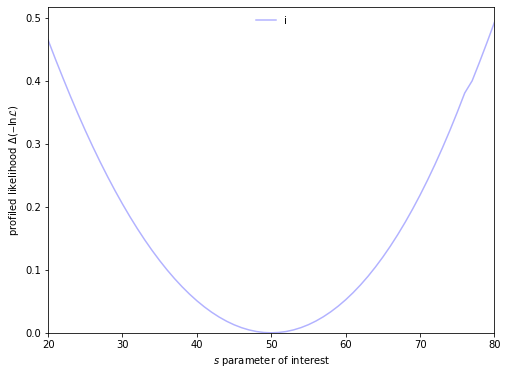

In [67]:
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
fig, ax = plt.subplots(figsize=(8,6))

shift_nll = p_nll-p_nll.min()
inf_line = ax.plot(s_exp_scan, shift_nll ,"b",alpha=0.3)

ax.set_ylim(bottom=0)
ax.set_xlim(left=s_exp_scan.min(), right=s_exp_scan.max())

ax.set_xlabel("$s$ parameter of interest")
ax.set_ylabel(r"profiled likelihood $\Delta(\mathcal{-\ln L})$")

ax.legend((inf_line), ("inference-aware"),
          loc="upper center",frameon=False)